In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
from os import path
import string
import numpy
import re
from __future__ import absolute_import, division, print_function
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
import pandas as pd
from gensim.models import KeyedVectors
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
model_whole = KeyedVectors.load_word2vec_format('model-whole.bin', binary = True)

os.chdir("D://Scriptie//Data//models//10yp_s120")
list_mod = glob.glob('*w120_10yp_model.bin')

df_vocab = pd.DataFrame()
    
for model in sorted(list_mod):
    m = KeyedVectors.load_word2vec_format(model, binary = True)
    m = pd.DataFrame(list(m.wv.vocab.keys()))
    m['year'] = model[0:4]
    df_vocab = df_vocab.append(m)
    
df_vocab.columns = ['word', 'p']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [7]:
def ModelCheck(input_list):
    return [w for w in input_list if (df_vocab['word'] == w).sum() == 10]

In [11]:
def MSW(word,n):
    t = dict(model_whole.most_similar(word, topn=n))
    return list(t.keys())

def GetList(term):
    mtf = list()

    for word in MSW(term, 5):
    
        word_list = list()
    
        lw = MSW(word, 5)
    
        for w in lw:
            tmp = MSW(w, 5)
            for i in tmp:
                word_list.append(i)
    
        for x in word_list:
            mtf.append(x)
    return sorted(list(set(mtf)))

def GetListMultipleKW(list_of_terms):
    
    master_list = list()
    
    for term in list_of_terms:
        tmp = GetList(term)
        for t in tmp:
            master_list.append(t)
    
    
    master_list = pd.DataFrame(master_list, columns = ['word'])
    vc = master_list.word.value_counts() == len(list_of_terms)
    vc = vc[vc]
    master_list.loc[master_list.word.isin(vc.index)]
    
    return(list(master_list.word))

def ModelCheck(input_list):
    vc = df_vocab.word.value_counts() == 10
    vc = vc[vc]
    df_vocab.loc[df_vocab.word.isin(vc.index)]
    
    return [w for w in input_list if w in list(master_list.word)]

In [25]:
list_1 = GetListMultipleKW(['koningin', 'prins', 'keizer', 'koning'])
list_2 = GetListMultipleKW(['minister', 'vertegenwoordiger', 'afgevaardigde'])

list_1 = [l for l in list_1 if l not in list_2]
list_2 = [l for l in list_2 if l not in list_1]

print('first list: ' + str(len(list_1)) + ' | sec. list: ' + str(len(list_2)))

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


first list: 114 | sec. list: 104


*** Function to Create Vector Scale and Plot Input Term on Scale ***

In [13]:
def PlotScale(year, list_1, list_2, search_term):
    mfn = [m for m in list_mod if int(m[0:4]) == year]
    model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)
    vl = np.average(model[[w for w in list_1 if w in list(model.wv.vocab.keys())]], axis=0) - np.average(model[[w for w in list_2 if w in list(model.wv.vocab.keys())]], axis=0)
    model.add('vector_cn',vl,replace=False)
    
    test_plot = pd.DataFrame()

    comb_list = list_1 + list_2 + [search_term]
    comb_list = [w for w in comb_list if w in list(model.wv.vocab.keys())]
    
    for i in list(set(comb_list)):
        word_count = model.wv.vocab[i].count
        #word_count = c * 10
        s = model.similarity('vector_cn', i)
        word = i
        tmp = pd.DataFrame([s, word_count,i]).T
        tmp.columns = ['word_count', 's', 'word']
        test_plot = test_plot.append(tmp)
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.scatter(list(test_plot.word_count), list(test_plot.s))
    ax.axvline(x=0, color='r')

    for i, txt in enumerate(list(test_plot.word)):
        if txt == search_term:
            ax.annotate('   ' + txt, (list(test_plot.word_count)[i], list(test_plot.s)[i]),color='green', fontsize=20)
        else:
            ax.annotate('   ' + txt, (list(test_plot.word_count)[i], list(test_plot.s)[i]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


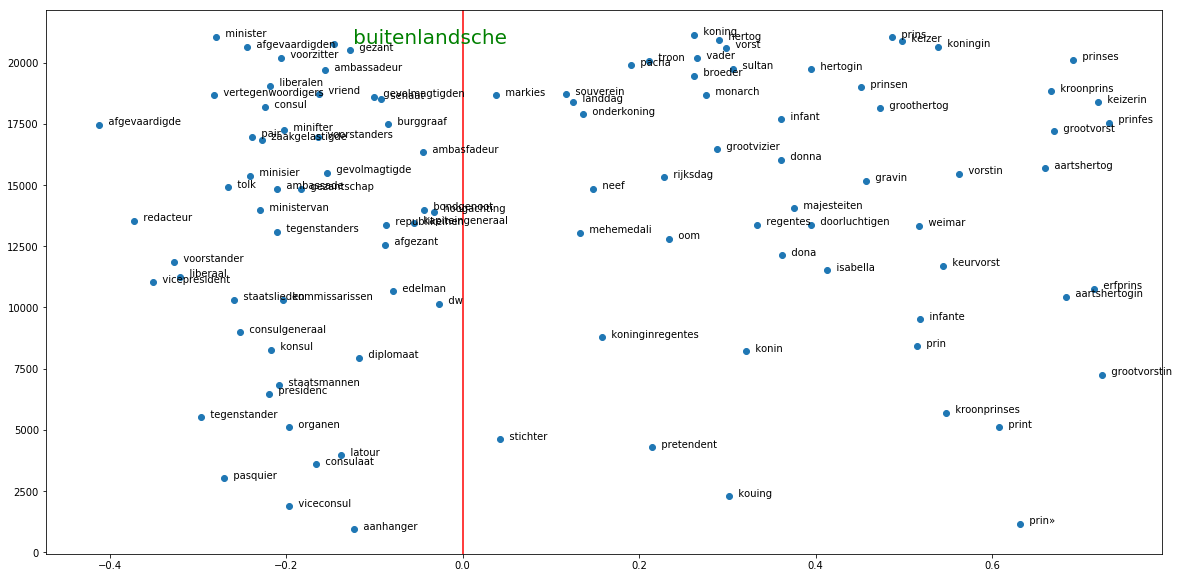

In [34]:
PlotScale(1825, list_1, list_2, 'buitenlandsche')

** Diachronic Measuring **

1. Get list of words that appears in every period
2. Loop over periods and create mean vector

In [40]:
dfr = pd.DataFrame()
os.chdir("D://Scriptie//Data//models//10yp_s120")

for year in list(range(1815,1906,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == year]
    model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)

    l1im = [w for w in list_1 if w in list(model.wv.vocab.keys())]
    l2im = [w for w in list_2 if w in list(model.wv.vocab.keys())]

    vl = np.average(model[l1im], axis=0) - np.average(model[l2im], axis=0)
    model.add('vector_cn',vl,replace=False)
    
    s = model.similarity('vector_cn', 'buitenland')
    f = model.wv.vocab['buitenland'].count
    tmp = pd.DataFrame([year,s,f]).T
    tmp.columns = ['y', 's', 'f']
    dfr = dfr.append(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


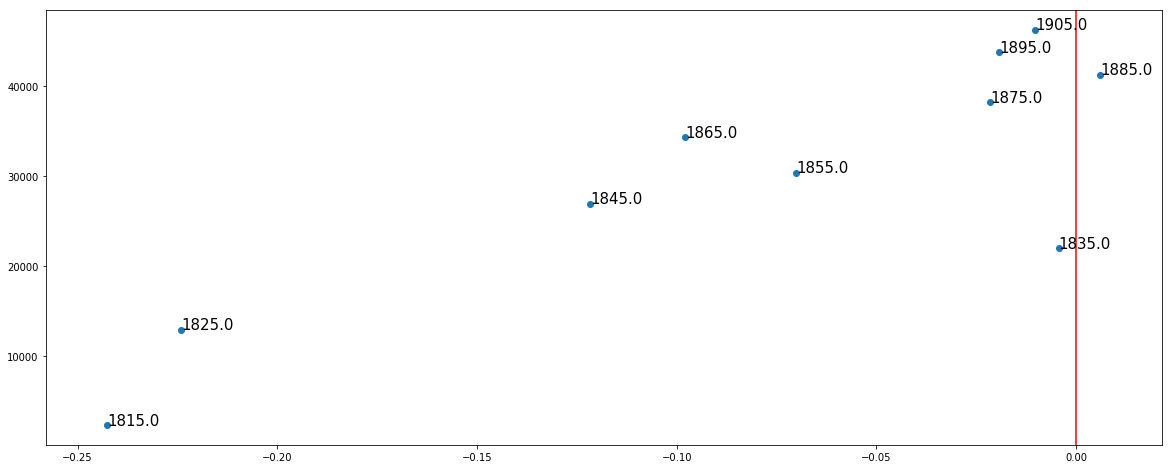

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(list(dfr.s), list(dfr.f))
ax.axvline(x=0, color='r')

for i, txt in enumerate(list(dfr.y)):
    if txt == 'buitenland':
        ax.annotate(txt, (list(dfr.s)[i], list(dfr.f)[i]),color='green', fontsize=20)
    else:
        ax.annotate(txt, (list(dfr.s)[i], list(dfr.f)[i]), fontsize=15)

In [57]:
dfr = pd.DataFrame()
os.chdir("D://Scriptie//Data//models//10yp_s120")

for year in list(range(1815,1906,10)):
    mfn = [m for m in list_mod if int(m[0:4]) == year]
    model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)


    s = model.similarity('veiligheid', 'buitenland')
    f = model.wv.vocab['buitenland'].count
    tmp = pd.DataFrame([year,s,f]).T
    tmp.columns = ['y', 's', 'f']
    dfr = dfr.append(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


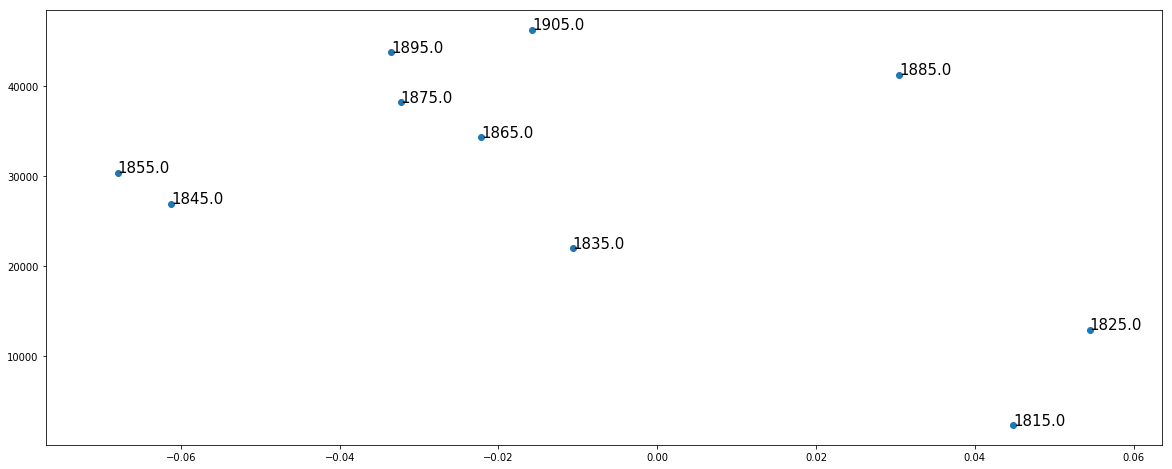

In [58]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(list(dfr.s), list(dfr.f))

for i, txt in enumerate(list(dfr.y)):
    if txt == 'buitenland':
        ax.annotate(txt, (list(dfr.s)[i], list(dfr.f)[i]),color='green', fontsize=20)
    else:
        ax.annotate(txt, (list(dfr.s)[i], list(dfr.f)[i]), fontsize=15)